# Praca domowa 5 - Ada Gąssowska

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
data=pd.read_csv("C:/Users/Ada/Desktop/clustering.csv", header=None)

In [33]:
data.head(10)

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
5,13.389996,-4.016202
6,-26.104987,8.618031
7,-15.625451,67.370573
8,85.259069,14.681990
9,33.039866,-49.611486


In [34]:
data.columns=['x','y']

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
x    400 non-null float64
y    400 non-null float64
dtypes: float64(2)
memory usage: 6.4 KB


Widać, że nie ma braków danych.

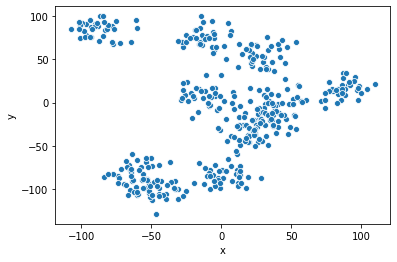

In [36]:
sns.scatterplot(data['x'],data['y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FA8F3E548>,
      dtype=object)

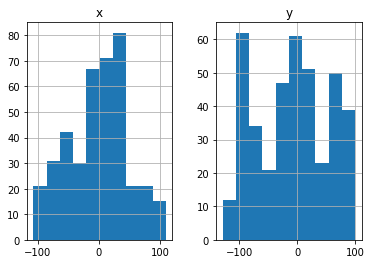

In [37]:
data.hist()

Widać że zmienne mają podobne wartości, dla upewnienia że mają równy wpływ na model przeskalujemy je. 


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=['x','y'])

Dane po przeskalowaniu:

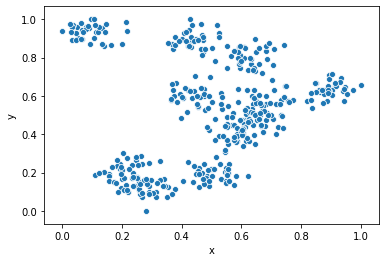

In [43]:
sns.scatterplot(data['x'],data['y'])

## Algorytm KMeans

### Szukanie liczby klastrów - metoda "łokcia"

In [8]:
def elbow_plot(data, k_max=20):
    wcss=[]
    for i in range (2, k_max+1):
        model=KMeans(n_clusters=i)
        model.fit(data)
        wcss.append(model.score(data)*(-1))
    x=range(2,k_max+1)
    plt.plot(x, wcss, marker='h')
    plt.xticks(np.arange(min(x), max(x)+1, 2))
    plt.title("Metoda łokcia dla KMeans")
    plt.show()
       

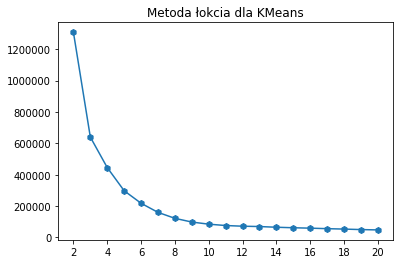

In [9]:
elbow_plot(data)

Ciężko określić, na oko między 5 a 8? Zobaczymy jak to wygląda na rysunkach

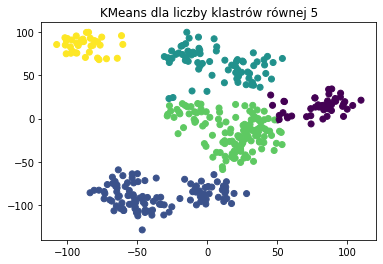

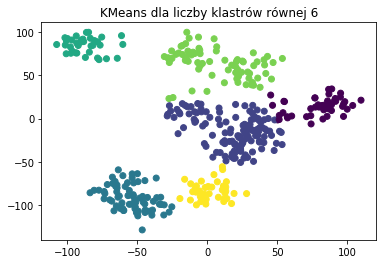

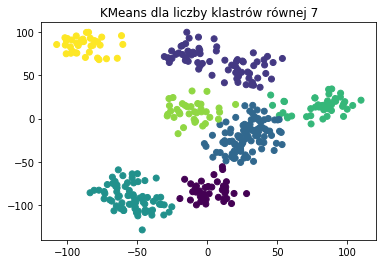

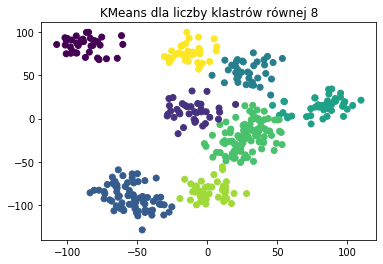

In [23]:
for i in [5,6,7,8]:
    model=KMeans(n_clusters=i)
    col=model.fit_predict(data)
    plt.scatter(data['x'], data['y'], c=col)
    plt.title("KMeans dla liczby klastrów równej " + str(i))
    plt.show()

Mnie najbardziej przekonuje rysunek dla 8 klastrów, tak intuicyjnie sama podzieliłabym te dane. 

## Aglomerative clustering


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [21]:
def silhouette_plot_agg(data, k_max=20):
    silhouette = []
    for i in range(2, k_max+1):
        model = AgglomerativeClustering(n_clusters=i)
        predictions = model.fit_predict(data)
        silhouette.append(silhouette_score(data, predictions, metric = 'euclidean'))
    x=range(2,k_max+1)
    plt.plot(x, silhouette, marker='h')
    plt.xticks(np.arange(min(x), max(x)+1, 2))
    plt.title("Silhouette dla Agglomerative Clustering")
    plt.show()
    


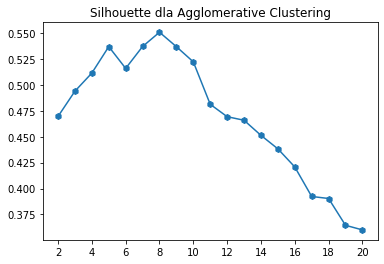

In [22]:
silhouette_plot_agg(data)

Zdecydowanie najlepiej wypada 8, natomiast 5,7 i 9 prawie jej dorównują. Zobaczmy jak to się prezentuje na rysunku

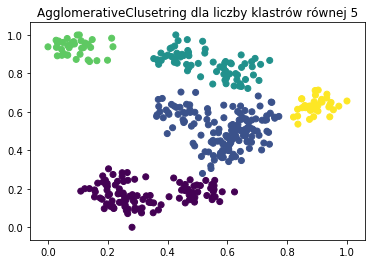

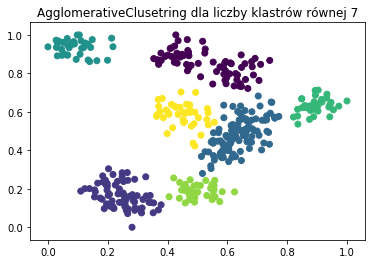

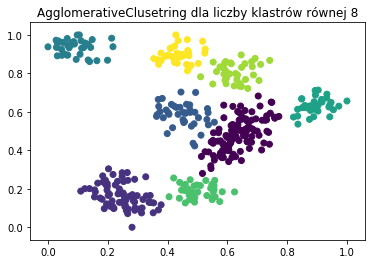

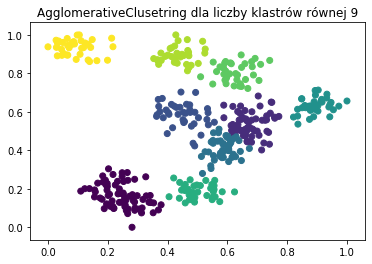

In [69]:
for i in [5,7,8,9]:
    model=AgglomerativeClustering(n_clusters=i)
    col=model.fit_predict(data)
    plt.scatter(data['x'], data['y'], c=col)
    plt.title("AgglomerativeClusetring dla liczby klastrów równej " + str(i))
    plt.show()
    

Ponownie wegług mnie (oczywiście subiektywna opinia), dobrze prezentuje się 8 klastrów. Podział na 9 też wygląda sensownie.

## Porównanie modeli dla 8 klastrów

Sprawdzimy średnią odległość między punktami w tym samym klastrze, oraz maksymalną odległość między punktami w tym samym klastrze. Lepszy model powinien mieć obie wartości niższe.

In [97]:
from scipy.spatial import distance

def avg_dist_score(data, labels):
    dists = []
    for label in labels:
        X = data.iloc[np.where(labels == label)]
        dists.append(np.mean(distance.pdist(X)))
    return np.mean(dists)
def max_dist_score(data,labels): 
    dists=[]
    for label in labels:
        X=data.iloc[np.where(labels==label)]
        dists.append(np.max(distance.pdist(X)))
    return np.max(dists)
        


In [110]:
model_km = KMeans(n_clusters=8)
model_agg= AgglomerativeClustering(n_clusters=8)
labels1=model_km.fit_predict(data)

labels2=model_agg.fit_predict(data)
labels1
print("Mean distance between points in the same cluster for KMeans: " +str(avg_dist_score(data, labels1)))
print("Maximum distance between points in the same cluster form KMeans: " + str(max_dist_score(data,labels1)))
print("Mean distance between points in the same cluster form AgglomerativeClustering: " + str(avg_dist_score(data,labels2)))
print("Maximum distance between points in the same cluster form AgglomerativeClustering: " + str(max_dist_score(data,labels2)))

Mean distance between points in the same cluster for KMeans: 0.0985239904383518
Maximum distance between points in the same cluster form KMeans: 0.31391821714830603
Mean distance between points in the same cluster form AgglomerativeClustering: 0.10067754305981227
Maximum distance between points in the same cluster form AgglomerativeClustering: 0.44365421116735065


Lepiej wypadł algorytm KMeans - obie wartości są niższe. 